# Machine Learning with Python

Have not yet decided which data sets im going to use. probably the typical example sets like Iris, Titanic etc. 
Notation will be mostly based on scikit_learn convetions and the book 'Elements of statisitical learning' by Hasties. 
Most probably I will steal some content from this guy https://github.com/donnemartin/data-science-ipython-notebooks


My draft for an outline:

    1. Start with very short primer on the mathematical formulation of the problem so everybody is familar with common notations often found in books or tutorials elsewhere. (Maybe 10 Minutes)     
    2. Some general remarks on scikit-learn and its structure. 
    3. Read and visualize an example data set (don't know which yet. Maybe Iris.)
    4. Unsuppervised Learning aka. clustering algorithms like KNN (and maybe  density based clustering like DBscan)
    5. Supervised Learning example and general formulation (loss functions and such). 
    6. Show some algorithms like naive bayes, SVMs, decission trees, neural nets..
    7. Validation. Cross validation, RoC curves etc. 
    
 

# A word on what machines can (and cannot) do

The term *Artifical Inteligence* was coined by John McArthy for the 1956 Dartmouth Conference. 

The idea of a *mechanical brain* is much older. 

![The Turk](https://upload.wikimedia.org/wikipedia/commons/8/8b/Tuerkischer_schachspieler_windisch4.jpg)   


The Church-Turing Thesis

> Every effectively calculable function is a computable function.

Using Turings definitions of computability

> "We shall use the expression 'computable function' to mean a function calculable by a machine, and let 'effectively calculable' refer to the intuitive idea without particular identification with any one of these definitions."

In other words:

> If something is intuitivly calculable (in whatever manner you can think of), it can be computed by a machine. 

> If something can be computed by a machine, it can be computed by a brain. (given enough time)

__Are computers just as good as human brains then?__

They seem to work well together.

Computer assisted proof of the Four-Color-Problem in 1989:
    
>  ...part of the proof was verified in over 400 pages of microfiche, which had to be checked by hand with the assistance of Haken's daughter...


__Well, no.__

Easy problem for machines:

* Is this text written in the english language?

Unsolvable problem for machines:

* What does this text mean?

![Alice checking for Poison](../resources/alice.jpg)

Machines are limited

* Mapping syntax and symbols to semantics and objects in the real world is something inherently human (or intelligent).

* Some problems are not computable (for either man or machine) however humans can write these problems (not the solutions) and mathematically __prove__ that they cannot be computed.

* Machines cannot "learn"

# Machine Learning



## Mathematical Notation and Problem Description

*For more details see "Elements of statistical Learning" by Trevor Hastie.* 


#### Supervised Machine Learning

Given a $N \times p$ matrix $\mathbf{X}$ matrix and some associated output vector $\mathbf{Y}$,
find a function that takes a vector $X \in \mathbb{R}^p$ and returns a prediction for $Y$,  $\hat{Y} \in \mathbb{R}$ i.e. 
$f(X) = \hat{Y}$ where some "loss function" $L(Y, f(X))$ is minimized for all $X$.

##### The Titanic Example

Passenger list of name, gender, age and the booked class on board.  

![Much Wow](../resources/nyt_titanic.jpg)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
pd.options.display.max_rows = 10
data = pd.read_csv('../resources/titanic.csv')
data.Survived = pd.Categorical(data.Survived)
data.Class = pd.Categorical(data.Class)
data.Sex = pd.Categorical(data.Sex)
data

,Name,Class,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,Yes
1,"Allison, Miss Helen Loraine",1st,2.00,female,No
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,No
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,No
4,"Allison, Master Hudson Trevor",1st,0.92,male,Yes
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,No
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,No
1310,"Zenni, Mr Philip",3rd,22.00,male,No
1311,"Lievens, Mr Rene",3rd,24.00,male,No


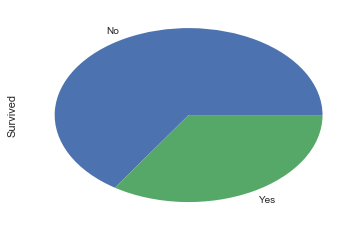

In [2]:
data.Survived.value_counts().plot.pie()

Given a new vector $X = (Name, Class, Age, Sex)$ can we find a function $f_{survival}(X) \in \{{yes, no}\}$ that accurately predicts the survival of the passengers in most cases?


Well yes. Let's presume rich people get to go into lifeboats.

```
def f_survival(passenger):
    if passenger.Class == '1st':
        return 'yes'
    else:
        return 'no'
```

But how do we know whether that predictor is any good?

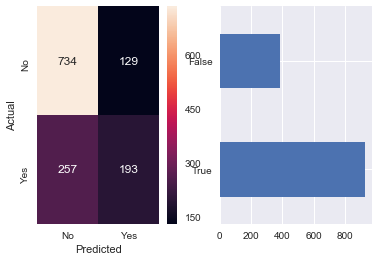

In [3]:
data['prediction'] = data.apply(lambda p: 'Yes' if p['Class'] == '1st' else 'No', axis='columns')
cm = pd.crosstab(data.Survived, data.prediction, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
(data.prediction == data.Survived).value_counts().plot.barh(ax=ax2)

What about the women? Maybe we get a better predictor.
 
```
def f_survival(passenger):
    if passenger.Sex == 'female':
        return 'yes'
    else:
        return 'no'
```

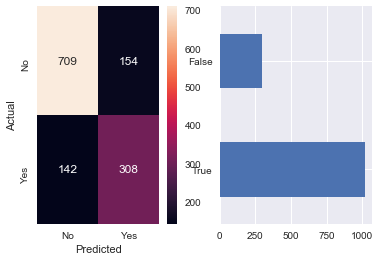

In [4]:
data['prediction'] = data.apply(lambda p: 'Yes' if p['Sex'] == 'female' else 'No', axis='columns')
cm = pd.crosstab(data.Survived, data.prediction, rownames=['Actual'], colnames=['Predicted'])

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
(data.prediction == data.Survived).value_counts().plot.barh(ax=ax2)

Can we improve our predictor by combining more variables into one predictor.

Lets presume a linear weighted combination of variables:

$$
f(X)= \hat{β}_0 + \sum_{j=1}^p X_j \hat{β}_j
$$

or in our case when combining sex and money:

$$
f(X)= \hat{β}_0 + X_{Class} \hat{β}_{Class} + X_{Sex} \hat{β}_{Sex}  
$$

How do you find those weights?

Choose and then optimize a loss function. In this case the popular residual sum of squares 

$$L(\beta) = RSS(\mathbf{\beta}) = \sum_{i=1}^N (Y_i - X_i^T \beta)^2 $$



Rewrite the problem in matrix form:

\begin{align}
X^T &= (1, Class, Sex) \\ 
\mathbf{\hat{\beta}}^T &= (\hat{β}_0, \hat{β}_{Class}, \hat{β}_{Sex}) \\
\mathbf{y} &= {Y_1, \ldots, Y_N} 
\end{align}

Makes the formulation more compact for the predictor

$$
\hat{\mathbf{y}} = X^T \hat{β}
$$

and the loss function

$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta )
$$


Optimize loss function just like any other function. Set the derivative equals to zero.

$$
{RSS}^\prime(\beta) =  \mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta ) \stackrel{!}{=} 0
$$

Solving for $\beta$ leads to

$$
\hat{β} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

You just invented Linear Least Squares regression.

Now we can define a function to predict passenger survival according to

$$
\hat{Y} = \begin{cases}
\text{Yes}, & \text{if $ f(X) \gt 0.5$} \\
\text{No}, & \text{if $ f(X) \le 0.5$}
\end{cases}
$$ 

Does it get any better though?

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


[-0.4617364  -0.16969731]


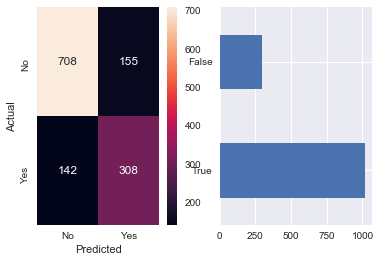

In [5]:
from sklearn import linear_model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X = data[['Sex', 'Class']].copy()
X.Sex = le.fit_transform(data.Sex)
X.Class = le.fit_transform(data.Class)

Y = le.fit_transform(data['Survived'])

reg = linear_model.LinearRegression()
reg.fit(X, Y)
print(reg.coef_)

data['prediction'] = ['Yes' if p > 0.5 else 'No' for p  in reg.predict(X) > 0.5]
cm = pd.crosstab(data.Survived, data.prediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(cm, annot=True, fmt='d', ax=ax1)
(data['prediction'] == data.Survived).value_counts().plot.barh(ax=ax2)

## Overview of SKlearn 

## Read and Visualize

In [7]:
iris = pd.read_csv('../resources/iris.csv')
iris.species = pd.Categorical(iris.species)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


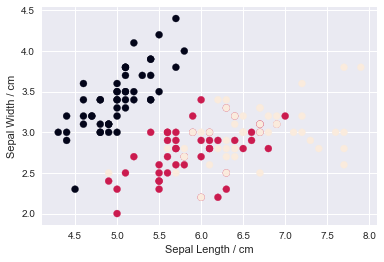

In [8]:
plt.scatter(iris.sepal_length,iris.sepal_width, c=iris.species.cat.codes)
plt.xlabel('Sepal Length / cm')
plt.ylabel('Sepal Width / cm')